In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import keras

from keras.layers import Convolution2D, Flatten, MaxPool2D
from keras.models import Sequential
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.layers import Dense, Activation, Input
from keras.models import Model

In [3]:
# Data loading

ds = pd.read_csv('/home/aayush/MLearning/datasets/mnist.csv')
ds.shape
data = ds.values[:8000]

In [4]:
data = ds.values[:8000]

In [5]:
X = data[:, 1:]/255.0
y = np_utils.to_categorical(data[:, 0])

print (X.shape, y.shape)

(8000, 784) (8000, 10)


In [6]:
split = int(0.8 * X.shape[0])

X_train = X[:split].reshape((-1, 28, 28, 1))
X_test = X[split:].reshape((-1, 28, 28, 1))

y_train = y[:split]
y_test = y[split:]

print (X_train.shape, X_test.shape)
print (y_train.shape, y_test.shape)

(6400, 28, 28, 1) (1600, 28, 28, 1)
(6400, 10) (1600, 10)


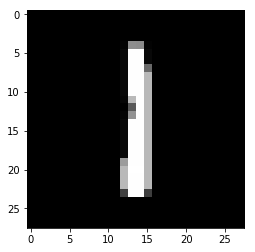

In [7]:
n_img = 2

plt.imshow(X_train[n_img].reshape((28, 28)), cmap='gray')
plt.show()

In [8]:
X_train[0].shape

(28, 28, 1)

In [24]:
inp=Input(shape=(X_train[0].shape))

c1=Convolution2D(32, (3, 3))
c2=Convolution2D(16, (3, 3))
c3=Convolution2D(8, (3, 3))

a1=Activation('sigmoid')
a2=Activation('sigmoid')
a3=Activation('sigmoid')

m1=MaxPool2D(pool_size=(2, 2))
m2=MaxPool2D(pool_size=(2, 2))

flat=Flatten()

den=Dense(10)

sof=Activation('softmax')


o1=m1(a2(c2(a1(c1(inp)))))

o2=sof(den(flat(a3(m2(c3(o1))))))


model = Model(inputs=[inp], outputs=[o2])
model.summary()
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])


m1=Model(inputs=[inp],outputs=[o1])
m1.summary()
m1.compile(loss='mse',optimizer='adam',metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_9 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 16)        4624      
_________________________________________________________________
activation_10 (Activation)   (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 8)         1160      
__________

In [26]:
hist = model.fit(X_train, y_train,
                epochs=15,
                shuffle=True,
                batch_size=200,
                validation_data=(X_test, y_test))

Train on 6400 samples, validate on 1600 samples
Epoch 1/15
6400/6400 [==============================] - 19s - loss: 0.0311 - acc: 0.8341 - val_loss: 0.0287 - val_acc: 0.8381
Epoch 2/15
6400/6400 [==============================] - 21s - loss: 0.0254 - acc: 0.8625 - val_loss: 0.0249 - val_acc: 0.8575
Epoch 3/15
6400/6400 [==============================] - 22s - loss: 0.0223 - acc: 0.8770 - val_loss: 0.0227 - val_acc: 0.8694
Epoch 4/15
6400/6400 [==============================] - 21s - loss: 0.0204 - acc: 0.8875 - val_loss: 0.0211 - val_acc: 0.8756
Epoch 5/15
6400/6400 [==============================] - 20s - loss: 0.0187 - acc: 0.8961 - val_loss: 0.0199 - val_acc: 0.8806
Epoch 6/15
6400/6400 [==============================] - 21s - loss: 0.0175 - acc: 0.9023 - val_loss: 0.0188 - val_acc: 0.8856
Epoch 7/15
6400/6400 [==============================] - 22s - loss: 0.0165 - acc: 0.9073 - val_loss: 0.0179 - val_acc: 0.8950
Epoch 8/15
6400/6400 [==============================] - 21s - loss: 0.

In [27]:
y=m1.predict(X_test[:4])

In [28]:
print(y[0,0,0])

[ 0.9731223   0.12157152  0.05289001  0.0090646   0.97353452  0.00358248
  0.98835981  0.01738922  0.01759977  0.62140763  0.99935263  0.86478078
  0.97199768  0.94912845  0.99621624  0.03901674]


In [29]:
xc=y.reshape((-1,12,12,16))

In [30]:
print(xc.shape)

(4, 12, 12, 16)


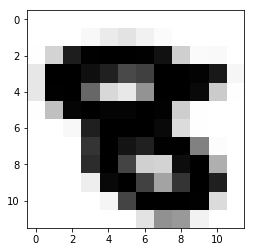

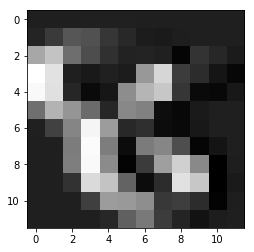

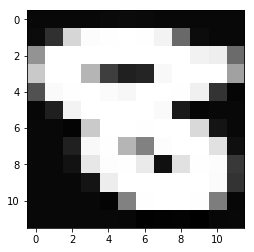

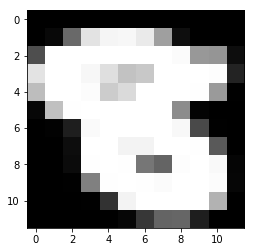

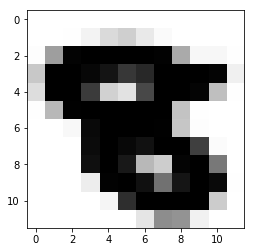

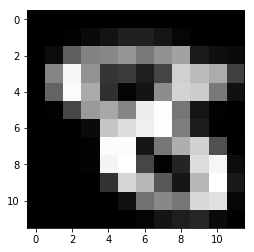

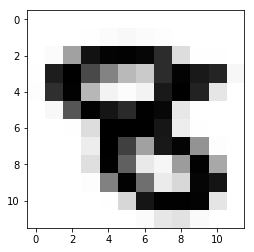

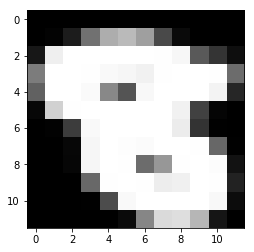

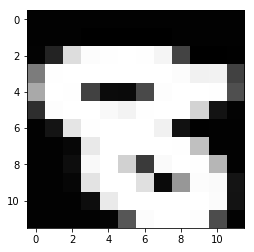

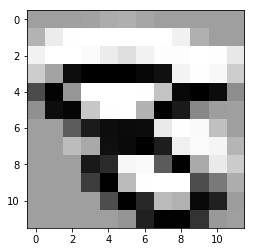

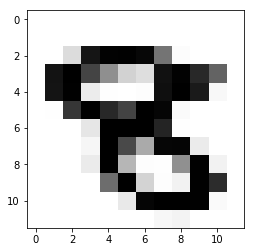

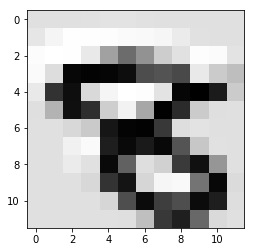

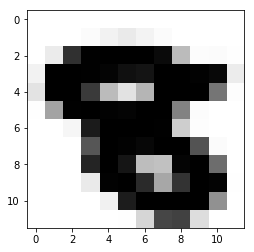

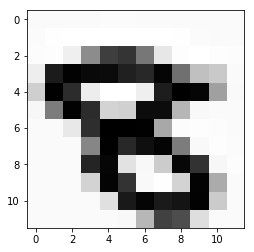

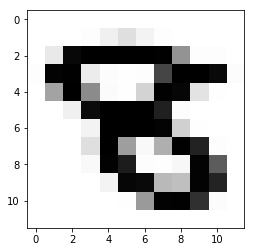

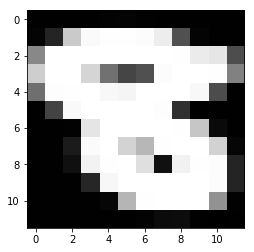

IndexError: index 16 is out of bounds for axis 3 with size 16

In [31]:
fg=3

for i in range(24):
    plt.figure(i)
    plt.imshow(xc[fg,:,:,i],cmap='gray')
    plt.show()